In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter

In [3]:
# Initialize LineModel with default model
m = lim()
m_cii = lim('Lichen_v3', doSim = True)
s_cii = lim('Silva_m4_z6_CCATp', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation
Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [3]:
m_cii.Nside

<Quantity 369.>

In [4]:
s_cii.Nside

<Quantity 369.>

In [4]:
m_cii.update(model_par = {'zdex': 0.5,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.017,
 'BehrooziFile': 'sfr_reinterp.dat'}, tobs = 40000*u.h)

In [4]:
s_cii.update(tobs = 40000*u.h)

In [5]:
m_cii.model_par

{'zdex': 0.5,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.017,
 'BehrooziFile': 'sfr_reinterp.dat'}

In [6]:
mhiz_signal = m_cii.maps

Loading .npz catalogues...


In [7]:
mhiz_forecast_40 = m_cii.noise_added_map

In [8]:
silva_signal = s_cii.maps

Loading .npz catalogues...


In [9]:
silva_forecast_40 = s_cii.noise_added_map

$M_{\rm{HI}}$ & $Z$:

In [10]:
ind_m = 3

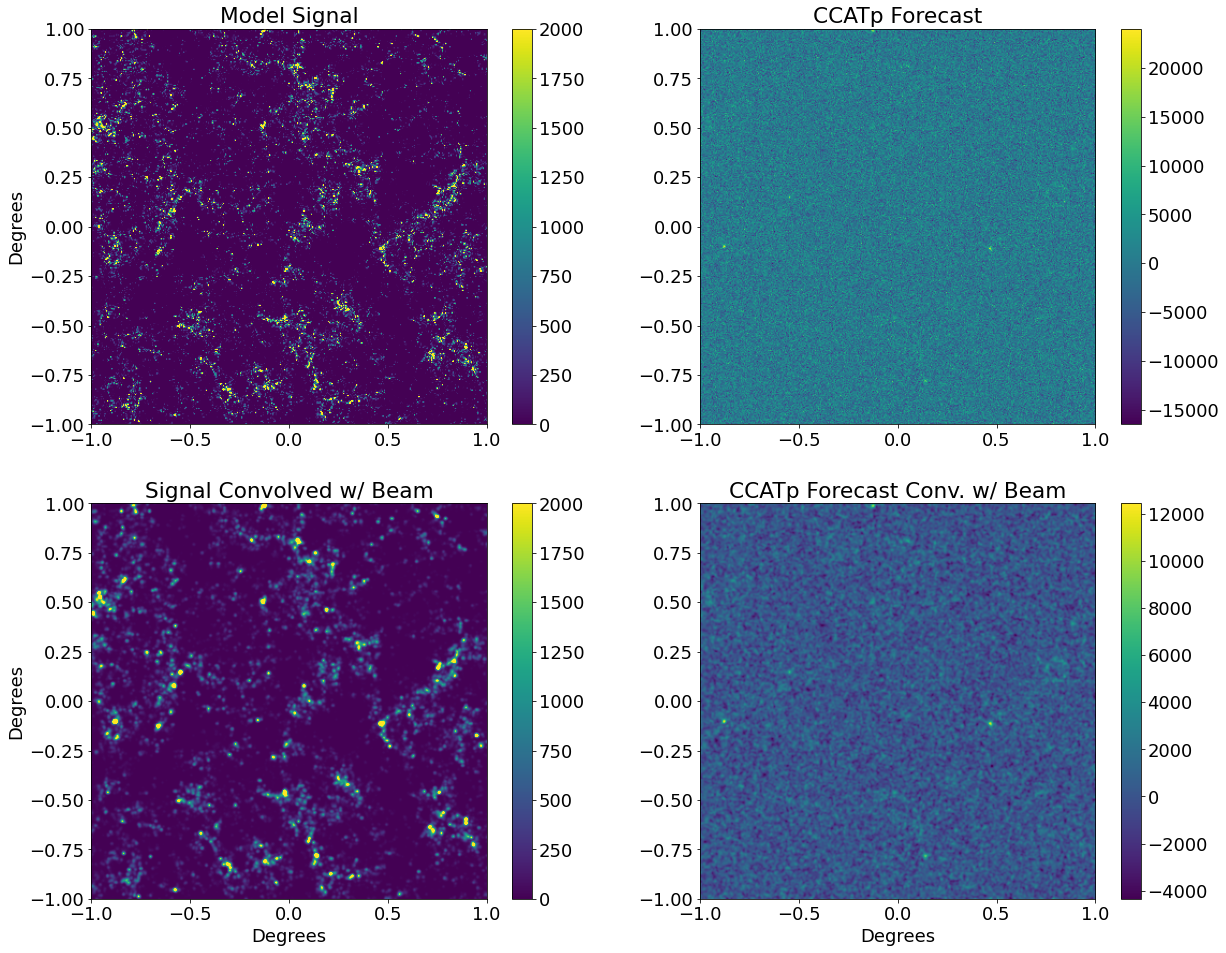

In [11]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 16))

plt.subplot(221)
plt.imshow(mhiz_signal.value[:, :, ind_m], vmax = 2000, extent = [-1, 1, -1, 1])
plt.title('Model Signal')
plt.ylabel('Degrees')
plt.colorbar()

plt.subplot(222)
plt.imshow(mhiz_forecast_40[:, :, ind_m], extent = [-1, 1, -1, 1])
plt.title('CCATp Forecast')
plt.colorbar()


plt.subplot(223)
plt.imshow(gaussian_filter(mhiz_signal.value[:, :, ind_m], 1), vmax = 2000, extent = [-1, 1, -1, 1])
plt.title('Signal Convolved w/ Beam')
plt.xlabel('Degrees')
plt.ylabel('Degrees')
plt.colorbar()


plt.subplot(224)
plt.imshow(gaussian_filter(mhiz_forecast_40[:, :, ind_m], 1), extent = [-1, 1, -1, 1])
plt.title('CCATp Forecast Conv. w/ Beam')
plt.xlabel('Degrees')
plt.colorbar()

Silva m4:

In [12]:
ind_s = 3

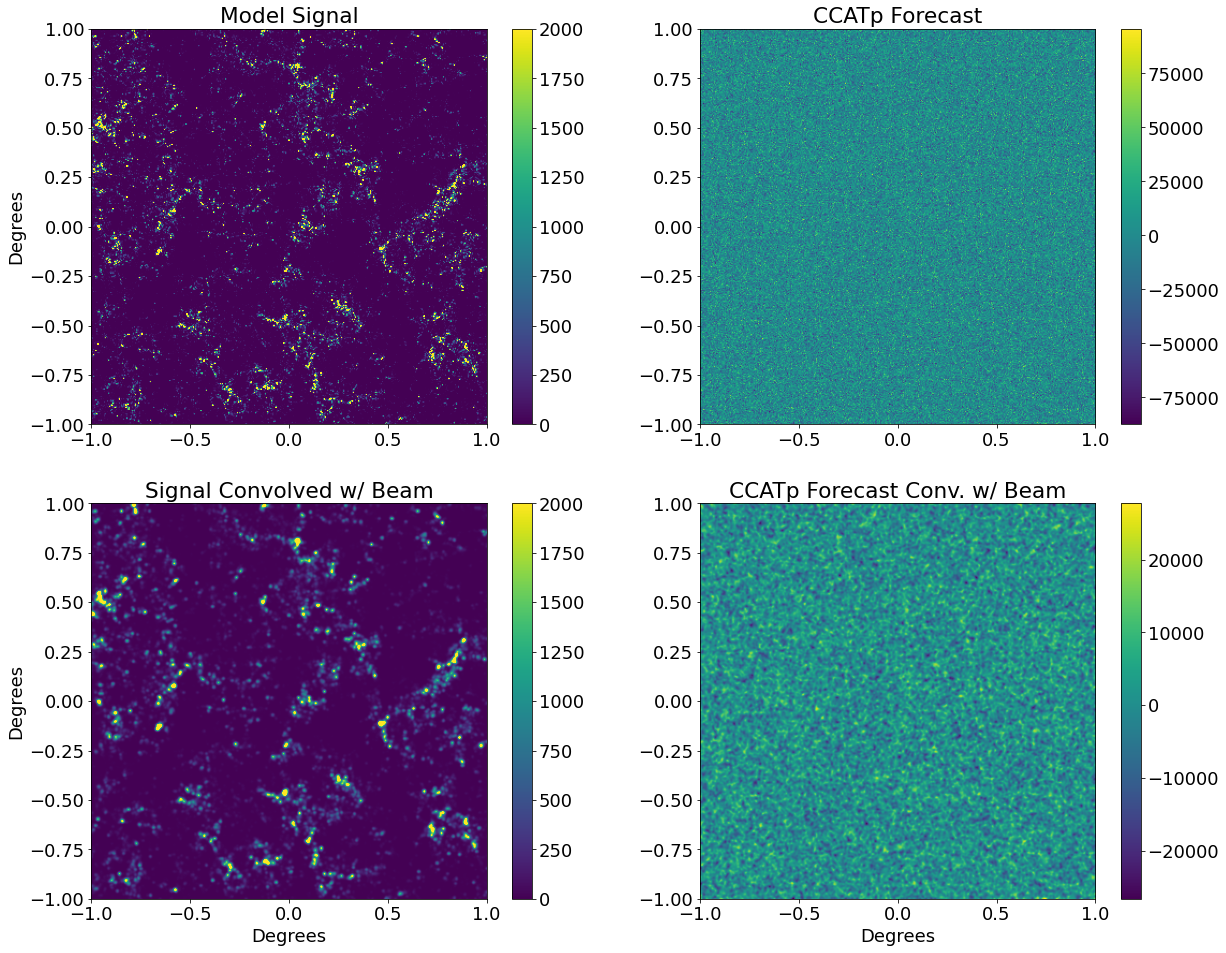

In [13]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 16))

plt.subplot(221)
plt.imshow(silva_signal.value[:, :, ind_s], vmax = 2000, extent = [-1, 1, -1, 1])
plt.title('Model Signal')
plt.ylabel('Degrees')
plt.colorbar()

plt.subplot(222)
plt.imshow(silva_forecast_40[:, :, ind_s], extent = [-1, 1, -1, 1])
plt.title('CCATp Forecast')
plt.colorbar()


plt.subplot(223)
plt.imshow(gaussian_filter(silva_signal.value[:, :, ind_s], 1), vmax = 2000, extent = [-1, 1, -1, 1])
plt.title('Signal Convolved w/ Beam')
plt.xlabel('Degrees')
plt.ylabel('Degrees')
plt.colorbar()


plt.subplot(224)
plt.imshow(gaussian_filter(silva_forecast_40[:, :, ind_s], 1), extent = [-1, 1, -1, 1])
plt.title('CCATp Forecast Conv. w/ Beam')
plt.xlabel('Degrees')
plt.colorbar()

/tmp/ipykernel_1491382/1281265777.py:16: RuntimeWarning: invalid value encountered in divide
  plt.imshow(np.log10(gaussian_filter(mhiz_signal.value[:, :, ind_m], 1)/gaussian_filter(silva_signal.value[:, :, ind_s], 1)), vmin = -2, vmax = 2, extent = [-1, 1, -1, 1], cmap = 'PiYG')


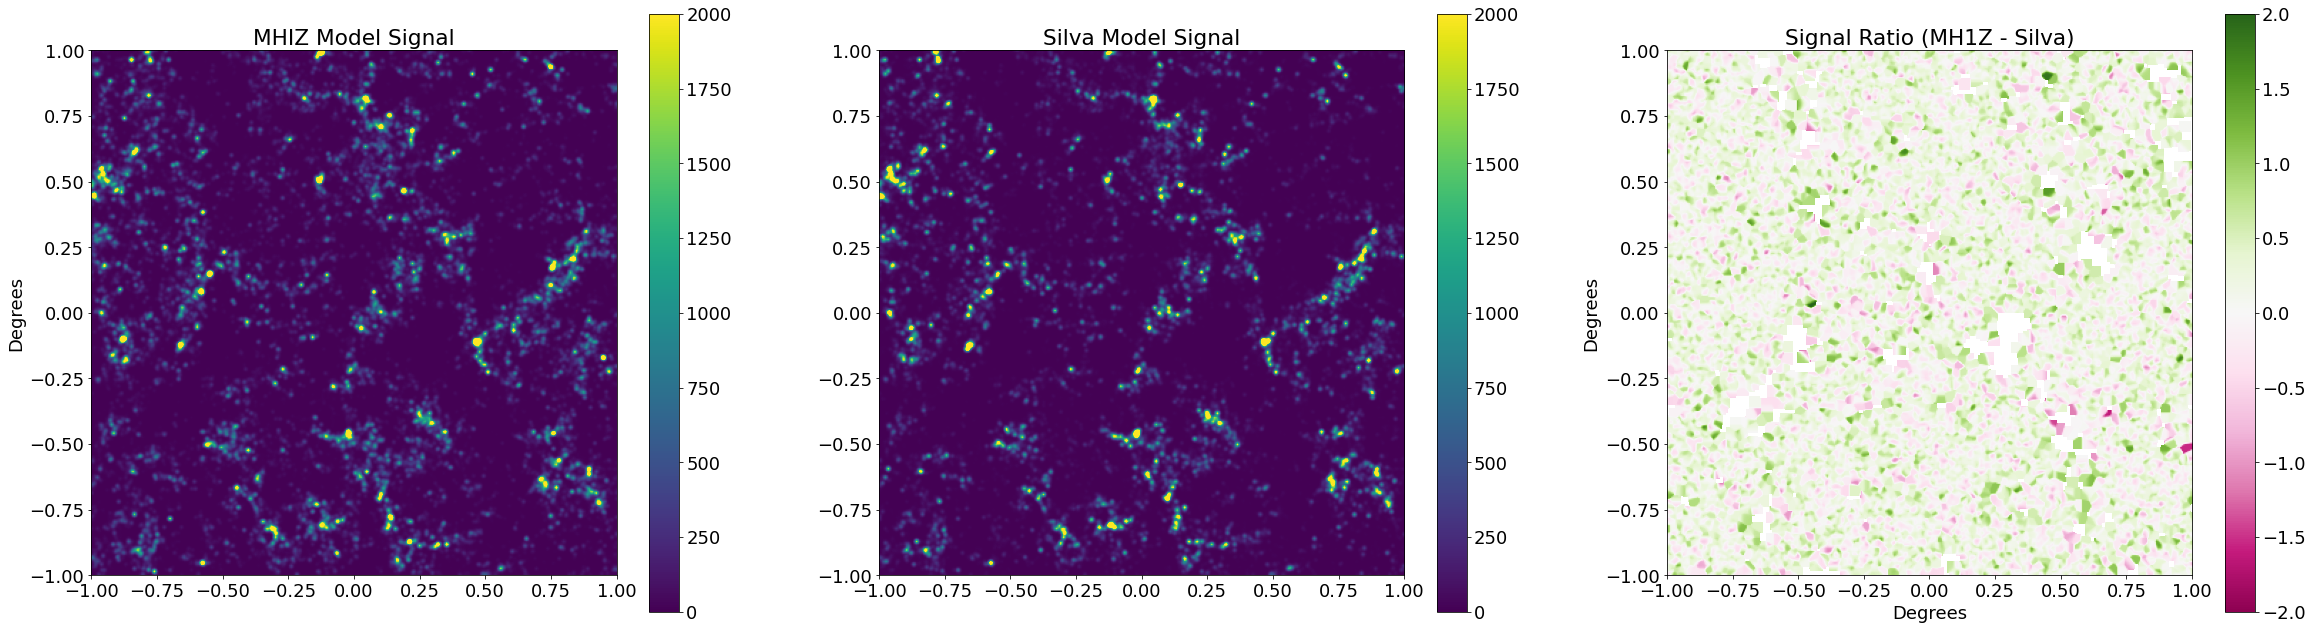

In [35]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (40, 11))

plt.subplot(131)
plt.imshow(gaussian_filter(mhiz_signal.value[:, :, ind_m], 1), vmax = 2000, extent = [-1, 1, -1, 1])
plt.title('MHIZ Model Signal')
plt.ylabel('Degrees')
plt.colorbar()

plt.subplot(132)
plt.imshow(gaussian_filter(silva_signal.value[:, :, ind_s], 1), vmax = 2000, extent = [-1, 1, -1, 1])
plt.title('Silva Model Signal')
plt.colorbar()


plt.subplot(133)
plt.imshow(np.log10(gaussian_filter(mhiz_signal.value[:, :, ind_m], 1)/gaussian_filter(silva_signal.value[:, :, ind_s], 1)), vmin = -2, vmax = 2, extent = [-1, 1, -1, 1], cmap = 'PiYG')
plt.title('Signal Ratio (MH1Z - Silva)')
plt.xlabel('Degrees')
plt.ylabel('Degrees')
plt.colorbar()

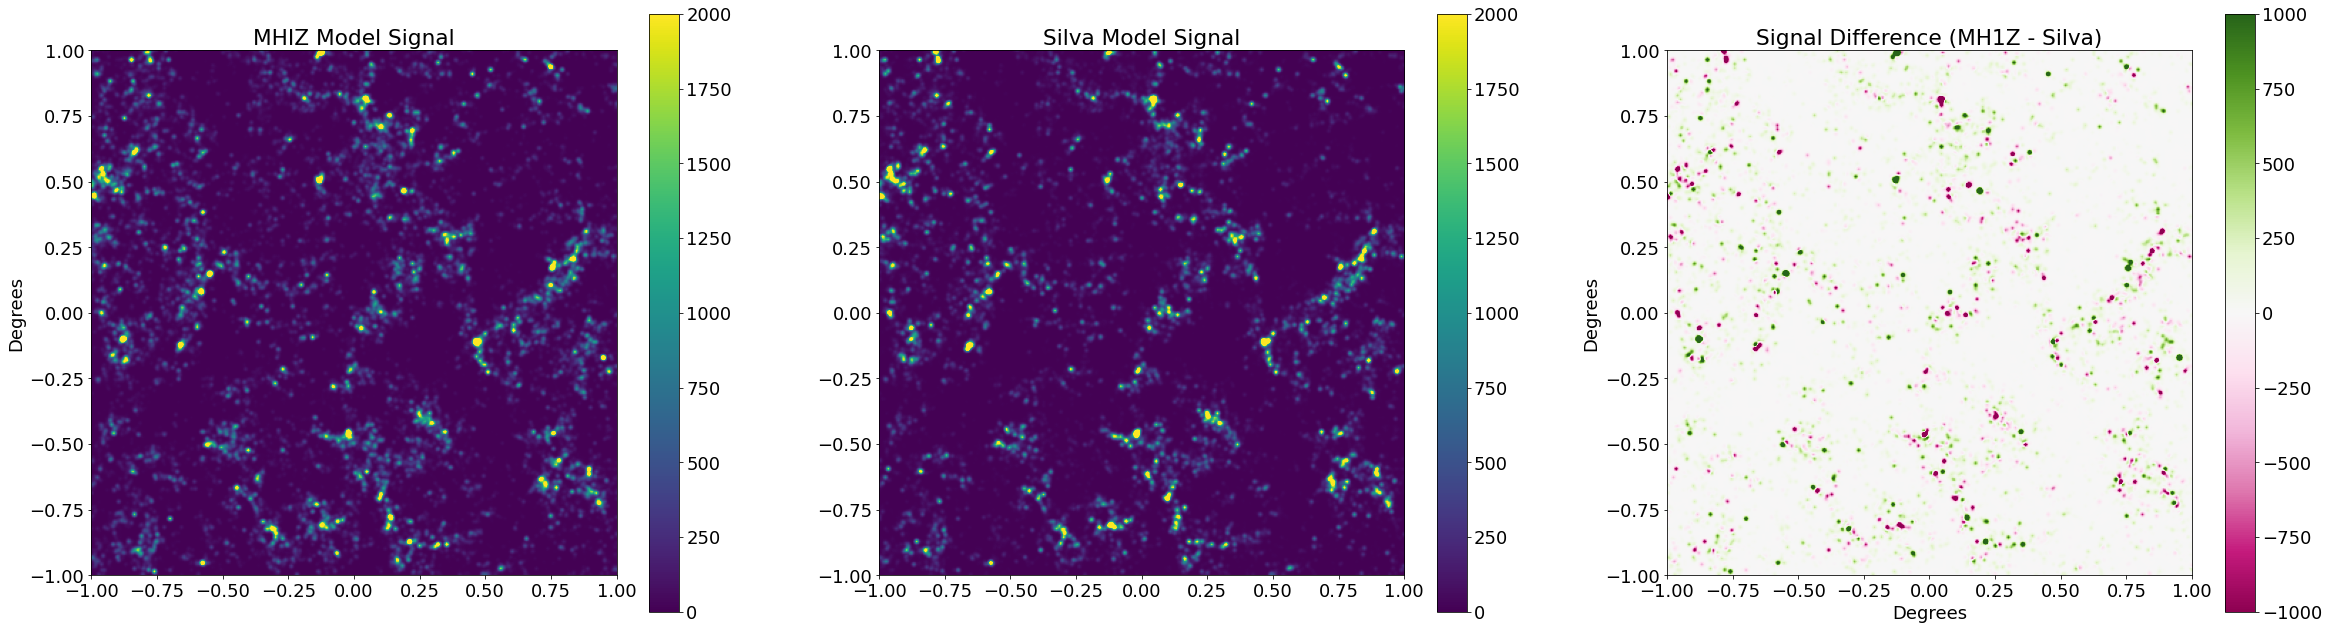

In [38]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (40, 11))

plt.subplot(131)
plt.imshow(gaussian_filter(mhiz_signal.value[:, :, ind_m], 1), vmax = 2000, extent = [-1, 1, -1, 1])
plt.title('MHIZ Model Signal')
plt.ylabel('Degrees')
plt.colorbar()

plt.subplot(132)
plt.imshow(gaussian_filter(silva_signal.value[:, :, ind_s], 1), vmax = 2000, extent = [-1, 1, -1, 1])
plt.title('Silva Model Signal')
plt.colorbar()


plt.subplot(133)
plt.imshow(gaussian_filter(mhiz_signal.value[:, :, ind_m], 1) - gaussian_filter(silva_signal.value[:, :, ind_s], 1), vmin = -1000, vmax = 1000, extent = [-1, 1, -1, 1], cmap = 'PiYG')
plt.title('Signal Difference (MH1Z - Silva)')
plt.xlabel('Degrees')
plt.ylabel('Degrees')
plt.colorbar()

Lichen figures:

3 panels

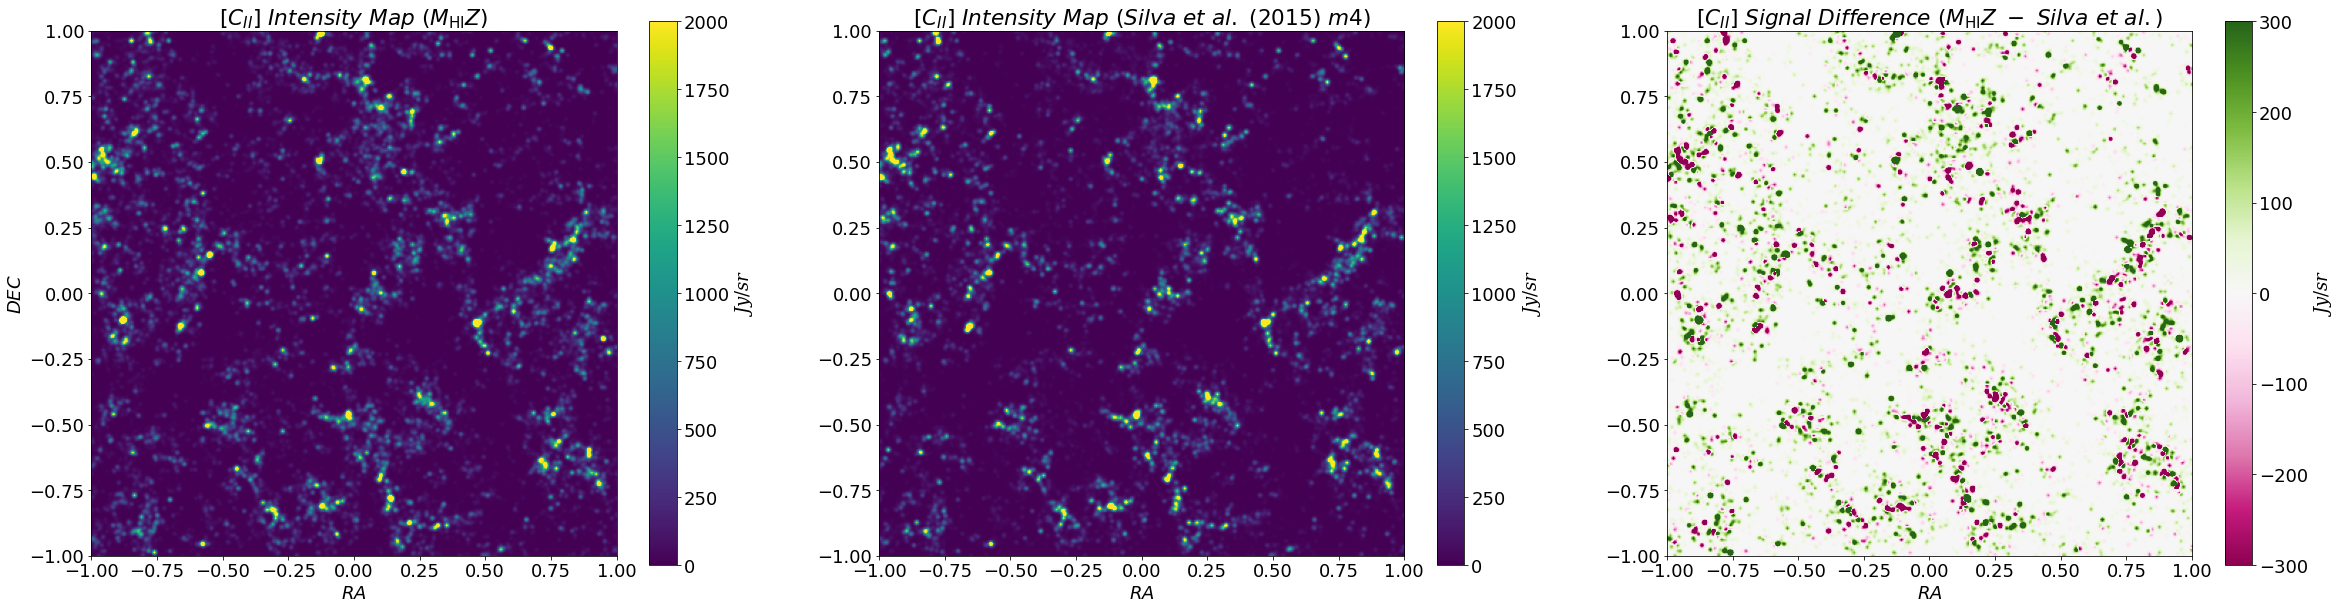

In [14]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (40, 10))

plt.rcParams["mathtext.fontset"] = "dejavuserif"

plt.subplot(131)
plt.imshow(gaussian_filter(mhiz_signal.value[:, :, ind_m], 1), vmax = 2000, extent = [-1, 1, -1, 1])
plt.title(r'$[C_{II}]\ Intensity\ Map\ (M_{\rm{HI}}Z)$')
plt.ylabel(r'$DEC$')
plt.xlabel(r'$RA$')
plt.colorbar(label = r'$Jy/sr$')

plt.subplot(132)
plt.imshow(gaussian_filter(silva_signal.value[:, :, ind_s], 1), vmax = 2000, extent = [-1, 1, -1, 1])
plt.title(r'$[C_{II}]\ Intensity\ Map\ (Silva\ et\ al.\ (2015)\ m4)$')
plt.xlabel(r'$RA$')
plt.colorbar(label = r'$Jy/sr$')

plt.subplot(133)
plt.imshow(gaussian_filter(mhiz_signal.value[:, :, ind_m], 1) - gaussian_filter(silva_signal.value[:, :, ind_s], 1), vmin = -300, vmax = 300, extent = [-1, 1, -1, 1], cmap = 'PiYG')
plt.title(r'$[C_{II}]\ Signal\ Difference\ (M_{\rm{HI}}Z\ -\ Silva\ et\ al.)$')
plt.xlabel(r'$RA$')
plt.colorbar(label = r'$Jy/sr$')

#plt.savefig('CII_analysis/lichen_silva_mhiz.png', bbox_inches = 'tight')

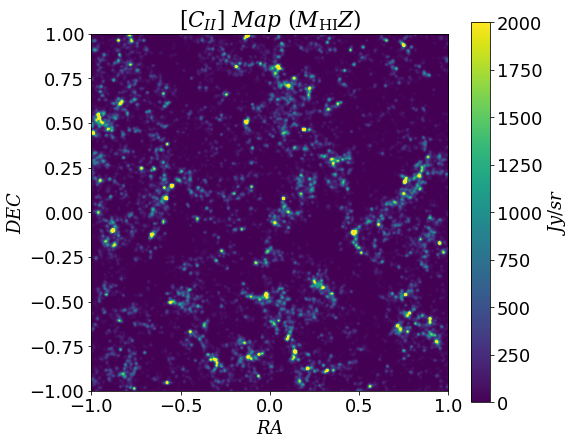

In [108]:
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.imshow(gaussian_filter(mhiz_signal.value[:, :, ind_m], 1), vmax = 2000, extent = [-1, 1, -1, 1])
plt.title(r'$[C_{II}]\ Map\ (M_{\rm{HI}}Z)$')
plt.ylabel(r'$DEC$')
plt.xlabel(r'$RA$')
plt.colorbar(label = r'$Jy/sr$')
plt.savefig('CII_analysis/lichen_silva_mhiz_1.png', bbox_inches = 'tight')

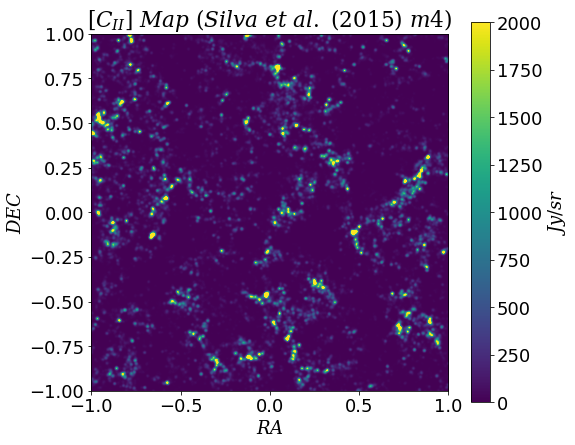

In [107]:
plt.imshow(gaussian_filter(silva_signal.value[:, :, ind_s], 1), vmax = 2000, extent = [-1, 1, -1, 1])
plt.title(r'$[C_{II}]\ Map\ (Silva\ et\ al.\ (2015)\ m4)$')
plt.ylabel(r'$DEC$')
plt.xlabel(r'$RA$')
plt.colorbar(label = r'$Jy/sr$')
plt.savefig('CII_analysis/lichen_silva_mhiz_2.png', bbox_inches = 'tight')

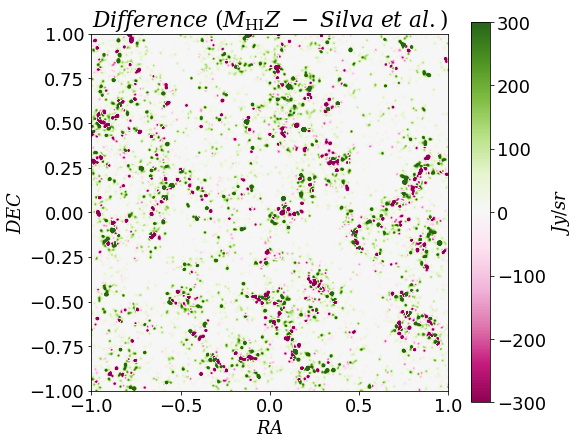

In [113]:
plt.imshow(gaussian_filter(mhiz_signal.value[:, :, ind_m], 1) - gaussian_filter(silva_signal.value[:, :, ind_s], 1), vmin = -300, vmax = 300, extent = [-1, 1, -1, 1], cmap = 'PiYG')
plt.title(r'$Difference\ (M_{\rm{HI}}Z\ -\ Silva\ et\ al.)$')
plt.ylabel(r'$DEC$')
plt.xlabel(r'$RA$')
plt.colorbar(label = r'$Jy/sr$')
plt.savefig('CII_analysis/lichen_silva_mhiz_3.png', bbox_inches = 'tight')

/tmp/ipykernel_1491382/2458557584.py:23: RuntimeWarning: invalid value encountered in divide
  plt.imshow(np.log10(gaussian_filter(mhiz_signal.value[:, :, ind_m], 1)/gaussian_filter(silva_signal.value[:, :, ind_s], 1)), vmin = -1, vmax = 1, extent = [-1, 1, -1, 1], cmap = 'PiYG')


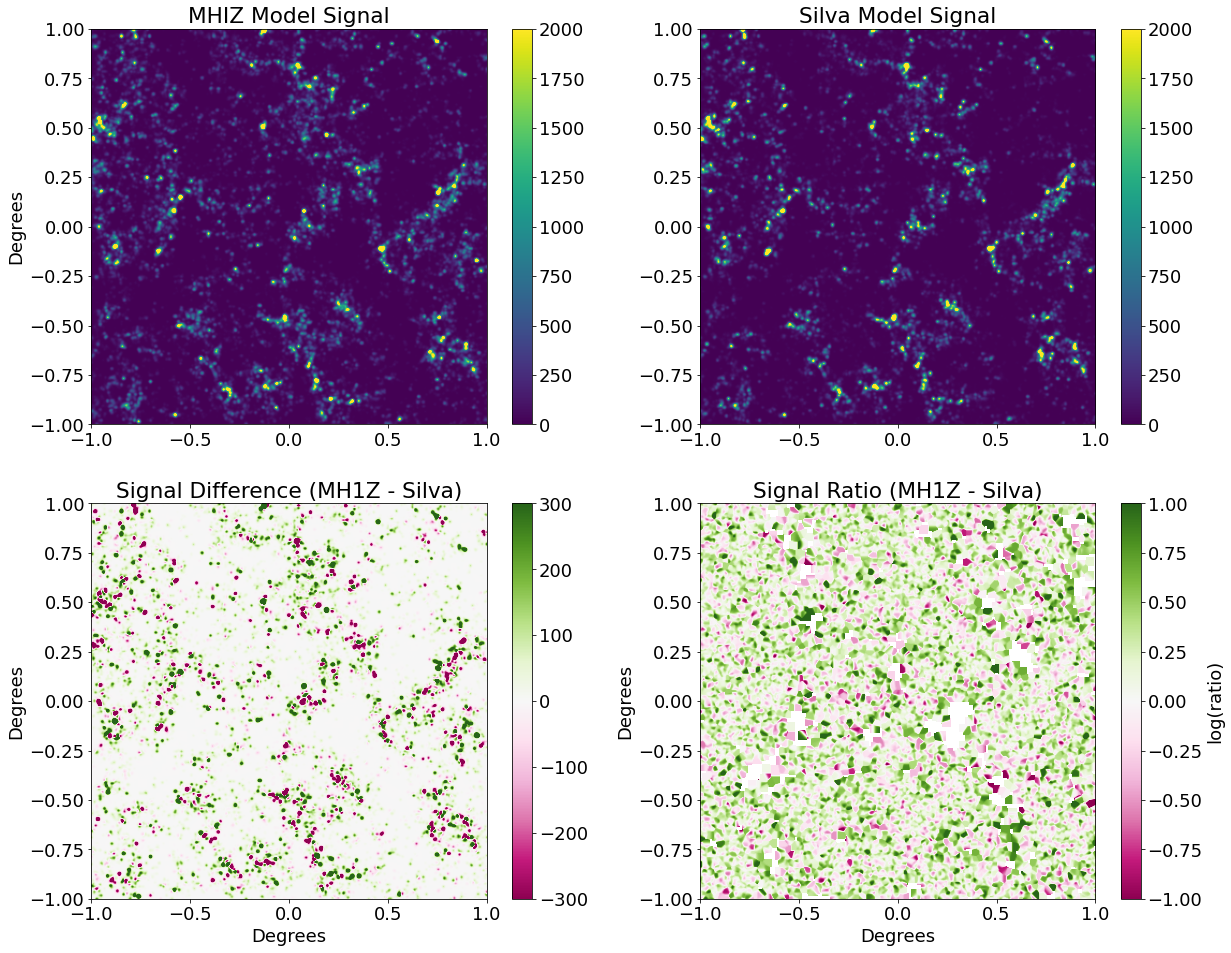

In [54]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 16))

plt.subplot(221)
plt.imshow(gaussian_filter(mhiz_signal.value[:, :, ind_m], 1), vmax = 2000, extent = [-1, 1, -1, 1])
plt.title('MHIZ Model Signal')
plt.ylabel('Degrees')
plt.colorbar()

plt.subplot(222)
plt.imshow(gaussian_filter(silva_signal.value[:, :, ind_s], 1), vmax = 2000, extent = [-1, 1, -1, 1])
plt.title('Silva Model Signal')
plt.colorbar()


plt.subplot(223)
plt.imshow(gaussian_filter(mhiz_signal.value[:, :, ind_m], 1) - gaussian_filter(silva_signal.value[:, :, ind_s], 1), vmin = -300, vmax = 300, extent = [-1, 1, -1, 1], cmap = 'PiYG')
plt.title('Signal Difference (MH1Z - Silva)')
plt.xlabel('Degrees')
plt.ylabel('Degrees')
plt.colorbar()

plt.subplot(224)
plt.imshow(np.log10(gaussian_filter(mhiz_signal.value[:, :, ind_m], 1)/gaussian_filter(silva_signal.value[:, :, ind_s], 1)), vmin = -1, vmax = 1, extent = [-1, 1, -1, 1], cmap = 'PiYG')
plt.title('Signal Ratio (MH1Z - Silva)')
plt.xlabel('Degrees')
plt.ylabel('Degrees')
plt.colorbar(label = 'log(ratio)')

In [50]:
mhiz_00zdex = mhiz_signal

In [25]:
np.mean(mhiz_signal.value)

61.25680866986208

In [26]:
np.mean(silva_signal.value)

68.96070437485636

In [15]:
silva_pk = s_cii.Pk_sim

In [16]:
mhiz_pk = m_cii.Pk_sim

In [17]:
k_cii = m_cii.k_sim

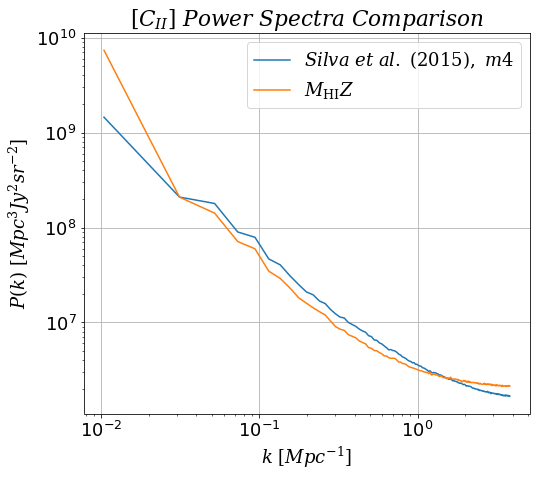

In [21]:
plt.rcParams["mathtext.fontset"] = "dejavuserif"


plt.plot(k_cii, silva_pk, label = r'$Silva\ et\ al.\ (2015),\ m4$')
plt.plot(k_cii, mhiz_pk, label = r'$M_{\rm{HI}}Z$')
plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'$k\ [Mpc^{-1}]$')
plt.ylabel(r'$P(k)\ [Mpc^3 Jy^2 sr^{-2}]$')
plt.title(r'$[C_{II}]\ Power\ Spectra\ Comparison$')
plt.legend()
plt.grid()

plt.savefig('CII_analysis/lichen_pspecs.png', bbox_inches = 'tight')

Histogram Gaussian Fit

In [8]:
from scipy.optimize import curve_fit

In [9]:
def gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [ ]:
map_shape = mhiz_signal.shape
noise_sigma = m_cii.sigma_N

noise_map  = np.random.normal(0, noise_sigma.to(u.Jy/u.sr, equivalencies=u.brightness_temperature(m_cii.nuObs)).value, map_shape)

Text(0.5, 1.0, 'Histogram of Intensities, tobs = 40000h')

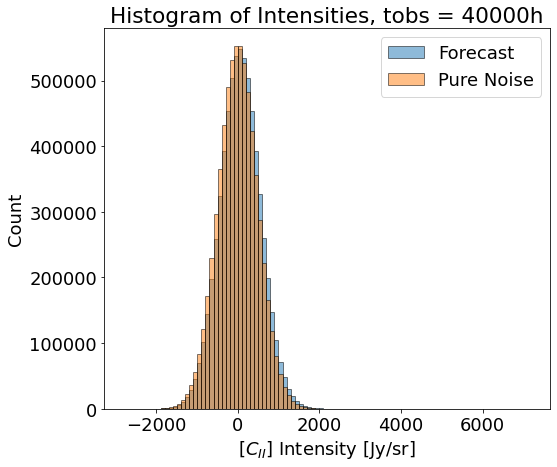

In [64]:
n_f, bins, _ = plt.hist(gaussian_filter(mhiz_forecast_40, 1).flatten(), bins = 100, edgecolor = 'black', label = 'Forecast', alpha = 0.5)
n_n, _, _ = plt.hist(gaussian_filter(noise_map, 1).flatten(), bins = bins, edgecolor = 'black', label = 'Pure Noise', alpha = 0.5)
plt.legend()

center = (bins[:-1] + bins[1:]) / 2


plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel('Count')
plt.title('Histogram of Intensities, tobs = 40000h')

In [65]:
a_f_i = np.max(n_f)
mean_f_i = np.mean(gaussian_filter(mhiz_forecast_40, 1).flatten())
sigma_f_i = m_cii.sigma_N.value

a_n_i = np.max(n_n)
mean_n_i = np.mean(gaussian_filter(noise_map, 1).flatten())
sigma_n_i = m_cii.sigma_N.value

popt_f, pcov_f = curve_fit(gauss, center, n_f, p0 = [a_f_i, mean_f_i, sigma_f_i])
popt_n, pcov_n = curve_fit(gauss, center, n_n, p0 = [a_n_i, mean_n_i, sigma_n_i])

Text(0.5, 1.0, 'Histogram of Intensities, tobs = 40000h')

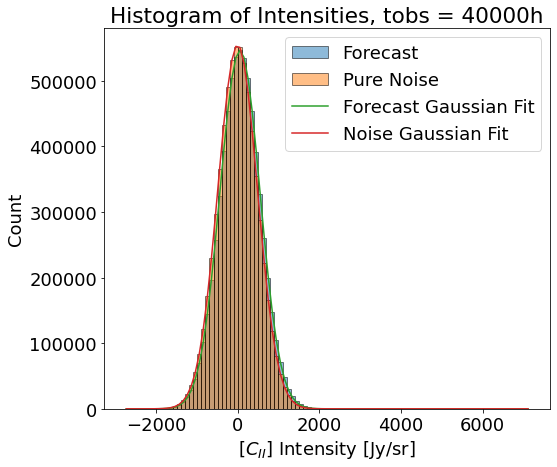

In [66]:
plt.hist(gaussian_filter(mhiz_forecast_40, 1).flatten(), bins = bins, edgecolor = 'black', label = 'Forecast', alpha = 0.5)
plt.hist(gaussian_filter(noise_map, 1).flatten(), bins = bins, edgecolor = 'black', label = 'Pure Noise', alpha = 0.5)
plt.plot(center, gauss(center, popt_f[0], popt_f[1], popt_f[2]), label = 'Forecast Gaussian Fit')
plt.plot(center, gauss(center, popt_n[0], popt_n[1], popt_n[2]), label = 'Noise Gaussian Fit')
plt.legend()


plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel('Count')
plt.title('Histogram of Intensities, tobs = 40000h')

Text(0.5, 1.0, 'Distribution of Intensities, tobs = 40000h')

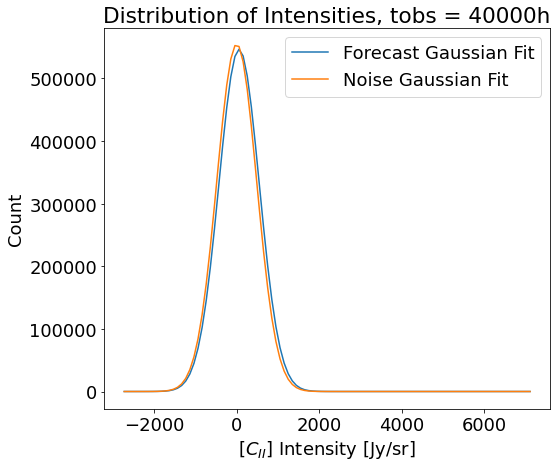

In [67]:
plt.plot(center, gauss(center, popt_f[0], popt_f[1], popt_f[2]), label = 'Forecast Gaussian Fit')
plt.plot(center, gauss(center, popt_n[0], popt_n[1], popt_n[2]), label = 'Noise Gaussian Fit')
plt.legend()


plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel('Count')
plt.title('Distribution of Intensities, tobs = 40000h')